### Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cd 'drive/Othercomputers/My Laptop (1)/MY COLLEGE/ISI KOLKATA/PROJECTS/IIT J Summer Internship 2022/Code/Neural-Uncertainty-Representation/'

/content/drive/Othercomputers/My Laptop (1)/MY COLLEGE/ISI KOLKATA/PROJECTS/IIT J Summer Internship 2022/Code/Neural-Uncertainty-Representation


In [ ]:
ls

Data-Prep.R                              old_data.npy           T-PHATE.ipynb
Helper-Functions.R                       PHATE.ipynb            VC_voxel.xlsx
l_OFC_voxel.xlsx                         Plots/                 Whole_BOLD.xlsx
m_OFC_voxel.xlsx                         README.md              YOUNG/
Neural-Uncertainty-Representation.Rproj  SLR-Comp-ROIs.R        young_data.npy
OLD/                                     Temporal_ratings.xlsx


### Importing necessary libraries

In [ ]:
!pip install phate
!pip install scprep

In [ ]:
import numpy as np
import phate as ph
import pandas as pd
import scprep as scp
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(1)

### Importing the data

We import the lOFC BOLD data for the young subjects

In [ ]:
data = pd.read_excel(r"YOUNG/lOFC.xlsx", header=None, engine='openpyxl', sheet_name=1)

Below we see the Voxel-Wise lOFC data for the $1^{st}$ young subject.

In [ ]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,179,180,181,182,183,184,185,186,187,188
0,107.251020,107.251020,106.781308,106.311595,106.155024,106.937878,105.528741,105.372170,105.215599,105.372170,...,102.867037,103.963033,104.119603,105.059028,104.432745,104.745887,105.059028,104.119603,104.119603,105.685312
1,76.406566,76.093425,75.936854,75.467141,75.310570,76.563137,75.310570,75.310570,75.154000,75.780283,...,71.866012,74.058004,73.588291,74.527716,74.214575,74.527716,74.840858,74.371145,73.901433,75.154000
2,76.876279,76.563137,76.719708,76.249995,76.093425,77.189420,76.249995,75.936854,75.780283,76.406566,...,72.492295,74.840858,74.058004,75.154000,74.840858,75.310570,75.780283,75.154000,74.527716,75.936854
3,75.936854,75.467141,75.780283,75.310570,74.684287,76.093425,75.310570,74.997429,74.527716,75.467141,...,70.926587,73.431720,72.648866,73.744862,73.118579,73.901433,74.214575,73.744862,73.275150,74.214575
4,80.320837,80.164266,80.164266,79.537983,79.224841,80.477408,79.694554,79.537983,79.068270,79.851124,...,76.249995,78.755129,77.972274,78.911699,78.441987,79.068270,79.381412,79.068270,78.285416,79.537983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,170.975349,170.975349,170.349066,170.662207,170.975349,169.409641,169.409641,169.096499,169.722782,170.035924,...,170.975349,171.288491,171.288491,171.914774,171.288491,170.975349,170.035924,170.662207,170.975349,170.662207
1696,165.025657,165.025657,164.399374,164.712516,164.712516,163.773091,163.459949,163.459949,164.086232,164.086232,...,165.025657,165.338799,165.338799,165.965082,165.338799,165.025657,164.399374,164.712516,165.338799,165.338799
1697,158.762824,158.762824,158.136541,158.136541,158.449682,157.823399,157.510257,157.197116,157.823399,158.136541,...,158.762824,159.075966,159.075966,159.389107,158.762824,159.075966,158.762824,158.762824,158.762824,159.075966
1698,164.712516,165.025657,164.399374,164.712516,164.712516,163.773091,163.459949,164.086232,164.399374,164.399374,...,165.965082,165.965082,166.278224,165.965082,165.965082,165.338799,164.712516,165.338799,165.651941,165.338799


### One vs One comparison of a young and old subject

In [ ]:
# We now instantiate the PHATE operator(matrix)/object of the PHATE class
phate_op = ph.PHATE()

In [ ]:
# PHATE requires Voxel x TR Data
phate_embd =  phate_op.fit_transform(data.T)

Calculating PHATE...
  Running PHATE on 1700 observations and 189 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.18 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.14 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.38 seconds.
  Calculating optimal t...
    Automatically selected t = 23
  Calculated optimal t in 2.86 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 2.08 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 4.70 seconds.
Calculated PHATE in 10.06 seconds.


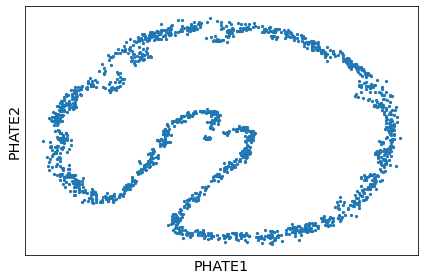

In [ ]:
scp.plot.scatter2d(phate_embd, ticks=None, label_prefix='PHATE')

We take a quick look at an old subject's data below

In [ ]:
data1 = pd.read_excel(r"OLD/l_OFC_voxel.xlsx", header=None, engine='openpyxl', sheet_name=1)

In [ ]:
data1

,0,1,2,3,4,5,6,7,8,9,...,527,528,529,530,531,532,533,534,535,536
0,58.557491,66.542604,63.411187,65.916320,67.638600,69.987162,71.866012,66.699175,68.264883,70.143733,...,152.813132,156.883974,138.721757,141.853174,145.610874,149.368574,152.813132,139.348041,142.792599,146.550299
1,58.244350,66.229462,62.941475,65.446608,67.325458,69.674020,71.396300,66.229462,67.951741,69.987162,...,151.873707,155.944549,137.782332,140.600607,144.358307,148.429149,152.186849,138.408616,141.853174,145.924016
2,57.618066,65.759750,62.158620,65.133466,67.012316,69.204308,70.613445,65.290037,67.638600,69.674020,...,151.873707,155.631407,136.529766,139.974324,144.045166,148.116007,151.560566,137.469191,141.226891,144.984591
3,57.618066,65.759750,62.002050,64.663754,66.855745,69.047737,70.613445,65.290037,67.168887,69.517450,...,152.499991,156.570832,137.156049,140.287466,144.671449,149.055432,152.813132,138.095474,142.166316,146.237157
4,57.618066,65.603179,62.315191,64.976895,67.012316,69.360879,70.770016,65.603179,67.482029,69.517450,...,153.126274,156.883974,136.842907,140.287466,144.984591,149.681716,153.126274,138.095474,142.166316,146.550299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,57.461495,66.229462,62.784904,65.446608,67.012316,69.204308,70.613445,65.759750,67.795170,69.674020,...,148.116007,151.873707,130.893216,135.277199,140.287466,144.671449,148.116007,133.398349,138.095474,142.479457
185,57.931208,66.386033,63.254616,65.446608,67.012316,69.360879,71.083158,66.542604,67.795170,69.674020,...,148.429149,152.186849,132.458924,136.529766,141.226891,145.297732,148.742291,134.650916,138.721757,142.792599
186,57.774637,65.916320,62.784904,65.133466,66.855745,69.204308,71.083158,66.229462,67.638600,69.830591,...,148.429149,152.499991,131.832641,135.903482,140.600607,144.984591,148.742291,134.024632,138.408616,142.479457
187,56.678641,65.133466,62.002050,64.976895,66.072891,67.951741,69.360879,64.820325,67.168887,68.891166,...,149.368574,153.126274,132.145782,136.216624,141.226891,145.610874,149.055432,134.337774,138.721757,143.105741


In [ ]:
phate_op = ph.PHATE()
phate_embd =  phate_op.fit_transform(data1.T)

Calculating PHATE...
  Running PHATE on 537 observations and 189 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.08 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 0.14 seconds.
  Calculating optimal t...
    Automatically selected t = 19
  Calculated optimal t in 0.16 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.11 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 0.33 seconds.
Calculated PHATE in 0.77 seconds.


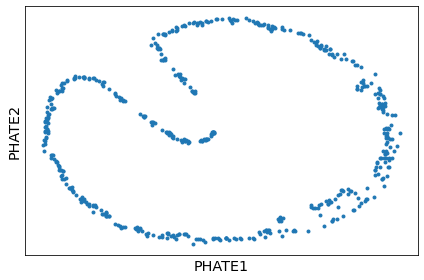

In [ ]:
scp.plot.scatter2d(phate_embd, ticks=None, label_prefix='PHATE')

### Average Young vs Average Old Subject Comparison

After a brief one-to-one comparison of one old and one young subject, we turn our attention to the entire data for each group.\
Loading the entire young subjects data 

In [ ]:
data = pd.ExcelFile(r"YOUNG/lOFC.xlsx", engine="openpyxl")

We see that there are in total 111 young subjects in our data

In [ ]:
len(data.sheet_names)

111

Let's look at the first young subject's data

In [ ]:
y1_data = data.parse("Sheet1", header=None)
y1_data

,0,1,2,3,4,5,6,7,8,9,...,1690,1691,1692,1693,1694,1695,1696,1697,1698,1699
0,112.200990,88.886499,89.979366,89.797221,88.886499,85.061465,84.332887,107.647379,110.197401,103.275912,...,175.951553,167.208619,189.430244,184.694488,182.144465,182.144465,178.865865,170.122930,179.958731,172.308664
1,111.836702,88.522210,89.432932,89.432932,88.522210,84.697176,83.968598,107.465234,109.650968,102.365189,...,176.315842,167.572908,189.065955,184.694488,181.780176,182.144465,178.865865,170.851508,179.958731,172.308664
2,112.383135,89.797221,90.707944,90.343655,89.615077,85.425754,85.061465,108.558101,110.197401,103.458056,...,176.315842,166.844330,189.794533,185.787354,181.780176,182.144465,179.230154,170.487219,180.323020,172.672953
3,112.747424,89.615077,90.525799,90.161510,89.432932,85.425754,84.879321,108.558101,110.925979,103.640201,...,177.408709,167.208619,190.523110,186.151643,182.873043,183.237332,180.323020,171.215797,181.051598,173.401531
4,112.383135,89.250788,89.979366,89.797221,89.068643,85.061465,84.150743,107.465234,109.104535,102.000900,...,176.315842,166.844330,190.158822,185.787354,182.508754,182.873043,179.594443,170.851508,181.051598,173.037242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,116.208169,92.347244,92.529388,91.072233,91.072233,85.061465,85.061465,107.283090,108.922390,101.818756,...,177.044420,168.665775,189.794533,185.058776,182.873043,182.873043,179.230154,171.215797,179.958731,172.672953
185,115.115302,91.982955,92.165099,90.525799,90.525799,84.515032,84.515032,108.011668,109.104535,102.000900,...,177.044420,168.665775,190.887399,185.787354,183.237332,183.237332,179.594443,171.215797,181.051598,173.401531
186,115.115302,91.618666,91.800810,90.161510,90.161510,84.332887,84.150743,107.100945,108.375957,101.090178,...,177.772998,169.394352,191.251688,186.515932,183.965910,183.965910,180.323020,172.308664,181.780176,174.130109
187,115.297446,91.618666,91.618666,90.343655,90.343655,84.515032,84.332887,107.647379,109.286679,102.000900,...,176.680131,168.301486,189.430244,185.058776,182.508754,182.508754,179.230154,170.851508,179.958731,172.308664


Constructing a 3D Tensor of all the young subject's data
- The Dimension of the Tensor is (TR, Voxel, Number of Subjects) 

In [ ]:
young_data = np.zeros((y1_data.shape[0], y1_data.shape[1], len(data.sheet_names)))

In [ ]:
# Run only once and save the .npy file
# for i in range(len(data.sheet_names)): # Takes long duration to complete, prefer saving the output tensor
#    young_data[:,:,i] = data.parse("Sheet"+str(i+1), header=None).to_numpy()

In [ ]:
# np.save('young_data.npy', young_data) 
young_data = np.load('young_data.npy')

Averaging the young subject's data over subjects

In [ ]:
avg_young_data = np.mean(young_data, axis=2)

In [ ]:
avg_young_data.shape

(189, 1700)

Loading all the old subject's data

In [ ]:
data = pd.ExcelFile(r"OLD/l_OFC_voxel.xlsx", engine="openpyxl")

We have 25 old subjects in our dataset

In [ ]:
len(data.sheet_names)

25

Let's look at the first old subject's data

In [ ]:
o1_data = data.parse("Sheet1", header=None)
o1_data

,0,1,2,3,4,5,6,7,8,9,...,527,528,529,530,531,532,533,534,535,536
0,58.468373,65.389863,66.482730,69.032752,70.307764,71.400630,73.222075,70.672052,73.950653,75.589953,...,168.665775,173.765820,147.537017,155.187084,164.658596,172.308664,176.680131,157.372818,165.022885,171.215797
1,57.921940,65.207718,66.664874,68.668463,69.943475,71.036341,72.857786,70.854197,73.586364,75.043520,...,168.665775,173.765820,148.265595,155.551373,164.658596,172.308664,177.044420,157.737107,165.022885,171.215797
2,58.286229,65.389863,66.300585,69.397041,70.307764,71.036341,72.675642,70.125619,74.132797,75.589953,...,167.937197,172.672953,146.444150,154.094217,163.565730,171.580086,176.315842,156.279951,164.658596,171.215797
3,57.921940,65.025574,66.300585,69.214897,69.943475,70.854197,72.493497,70.125619,73.768508,75.043520,...,169.394352,174.130109,147.901306,155.551373,165.022885,172.672953,177.044420,157.372818,165.387174,171.944375
4,58.286229,65.025574,65.936296,68.486319,69.761330,70.672052,72.311353,70.125619,73.586364,75.225664,...,169.758641,174.494398,147.901306,155.551373,165.387174,173.401531,177.772998,157.737107,166.115752,172.672953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,55.554062,62.657696,62.293407,67.757741,67.393452,67.211308,67.939885,63.204129,71.400630,72.311353,...,180.323020,185.787354,156.279951,165.751463,176.315842,183.965910,187.973088,168.301486,176.680131,182.508754
185,55.371917,62.475552,61.929118,67.393452,67.393452,67.029163,67.757741,62.839840,71.036341,71.764919,...,178.137287,183.601621,154.822795,163.930019,174.130109,182.508754,186.880221,166.480041,174.858686,181.415887
186,55.007628,62.111263,61.200540,67.211308,67.029163,66.847019,67.393452,61.929118,70.672052,71.582775,...,178.501576,183.965910,154.458506,163.930019,174.858686,183.237332,187.608799,166.480041,175.951553,182.508754
187,55.371917,62.657696,61.746974,67.757741,67.393452,67.211308,67.757741,62.657696,71.400630,72.311353,...,178.137287,183.601621,154.822795,163.930019,174.494398,182.508754,186.880221,166.480041,175.222975,181.780176


Constructing a 3D Tensor of all the old subject's data
- The Dimension of the Tensor is (TR, Voxel, Number of Subjects) 

In [ ]:
old_data = np.zeros((o1_data.shape[0], o1_data.shape[1], len(data.sheet_names)))

In [ ]:
# Run only once
# for i in range(len(data.sheet_names)): # Takes long duration to complete, prefer saving the output tensor
#     old_data[:,:,i] = data.parse("Sheet"+str(i+1), header=None).to_numpy()

In [ ]:
# np.save('old_data.npy', old_data) 
old_data = np.load("old_data.npy")

Averaging the old subject's data over subjects

In [ ]:
avg_old_data = np.mean(old_data, axis=2)

In [ ]:
avg_old_data.shape

(189, 537)

Running the PHATE Dimension Reduction on both average young and old subject's data and visualization with the averaged data below.

In [ ]:
phate_op = ph.PHATE()
phate_embd_young =  phate_op.fit_transform(avg_young_data.T)
phate_op = ph.PHATE()
phate_embd_old =  phate_op.fit_transform(avg_old_data.T)

Calculating PHATE...
  Running PHATE on 1700 observations and 189 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.15 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.08 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.28 seconds.
  Calculating optimal t...
    Automatically selected t = 20
  Calculated optimal t in 3.43 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 1.53 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 5.30 seconds.
Calculated PHATE in 10.58 seconds.
Calculating PHATE...
  Running PHATE on 537 observations and 189 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.07 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.04 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 sec

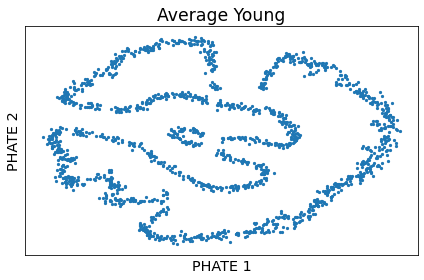

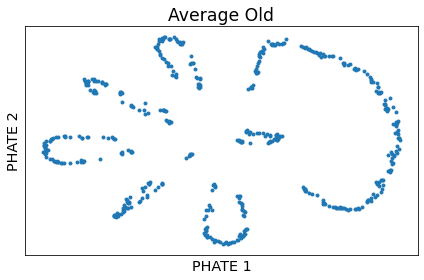

In [ ]:
scp.plot.scatter2d(phate_embd_young, ticks=None, label_prefix='PHATE ', title="Average Young")
scp.plot.scatter2d(phate_embd_old, ticks=None, label_prefix='PHATE ', title="Average Old")

We have lot less number of voxels in old subjects compared to young subjects(i.e. 537 vs 1700 voxels).\
So, I suspect that some part of the under represented structure in the old subject PHATE is attributed due to this less number of voxels.\
Some suggestions:
- Filtering the same/similar 537 voxels from the young subject's data on which data is present for old subjects and then comparing the PHATE visualizations.

Quick Fix:
- For a heurestic/rough comparison of the above mentioned issue. I randomly selected 537 voxels from the young subject's data and applied PHATE on it. The visualization shows that the visualization for the young and old subjects are more or less the same.

In [ ]:
rand_voxs = np.random.randint(1700, size=537) # Random Voxels picked from young subjects

Calculating PHATE...
  Running PHATE on 537 observations and 189 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.05 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.13 seconds.
  Calculating optimal t...
    Automatically selected t = 26
  Calculated optimal t in 0.15 seconds.


/usr/local/lib/python3.7/dist-packages/graphtools/graphs.py:293: RuntimeWarning: Detected zero distance between 66 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  RuntimeWarning,


  Calculating diffusion potential...
  Calculated diffusion potential in 0.10 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 0.35 seconds.
Calculated PHATE in 0.77 seconds.


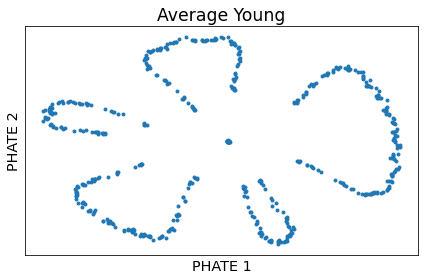

In [ ]:
phate_op = ph.PHATE()
phate_embd_young =  phate_op.fit_transform(avg_young_data[:,rand_voxs].T)
scp.plot.scatter2d(phate_embd_young, ticks=None, label_prefix='PHATE ', title="Average Young")

A major drawback to the above quick fix is as shown below,
- We see that the distribution of the voxel and their values across the TRs are differently distributed in randomly selected voxels of young compared to that of old are quite different(with very low number of higher and lower BOLD value voxels in young on average), which can be fixed by following the suggestions given before about extracting the same voxels.
- The randomly chosen voxels when averaged across TRs of young subjects show approx. symmetric distribution compared to negatively skewed distribution for old subjects.

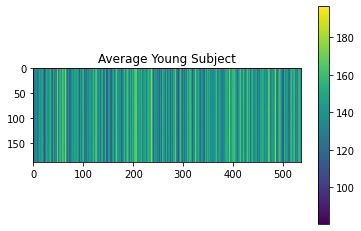

In [ ]:
p1 = plt.imshow(avg_young_data[:,rand_voxs])
plt.title("Average Young Subject")
plt.colorbar(p1)

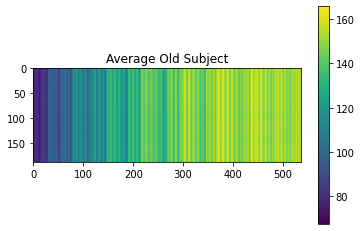

In [ ]:
p1 = plt.imshow(avg_old_data)
plt.title("Average Old Subject")
plt.colorbar(p1)

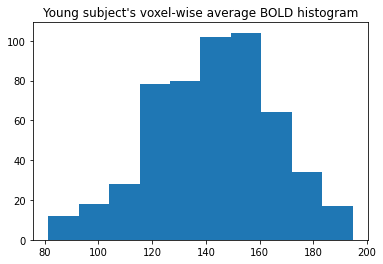

In [ ]:
plt.hist(np.mean(avg_young_data[:,rand_voxs], axis=0))
plt.title("Young subject's voxel-wise average BOLD histogram")
plt.show()

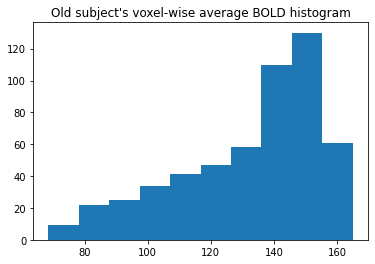

In [ ]:
plt.hist(np.mean(avg_old_data, axis=0))
plt.title("Old subject's voxel-wise average BOLD histogram")
plt.show()

Now, we have the same 537 voxel data available for the young subjects about which we mentioned in the suggestion above. So, let's proceed with the vanilla PHATE representation difference.

In [ ]:
data = pd.ExcelFile(r"YOUNG/l_OFC_537.xlsx", engine="openpyxl")

In [ ]:
len(data.sheet_names)

111

As we can see below the data of the young subjects is now comprising of the same 537 voxels of which we got the old subject's data on.

In [ ]:
y1_data = data.parse("Sheet1", header=None)
y1_data

,0,1,2,3,4,5,6,7,8,9,...,527,528,529,530,531,532,533,534,535,536
0,58.468373,65.389863,66.482730,69.032752,70.307764,71.400630,73.222075,70.672052,73.950653,75.589953,...,168.665775,173.765820,147.537017,155.187084,164.658596,172.308664,176.680131,157.372818,165.022885,171.215797
1,57.921940,65.207718,66.664874,68.668463,69.943475,71.036341,72.857786,70.854197,73.586364,75.043520,...,168.665775,173.765820,148.265595,155.551373,164.658596,172.308664,177.044420,157.737107,165.022885,171.215797
2,58.286229,65.389863,66.300585,69.397041,70.307764,71.036341,72.675642,70.125619,74.132797,75.589953,...,167.937197,172.672953,146.444150,154.094217,163.565730,171.580086,176.315842,156.279951,164.658596,171.215797
3,57.921940,65.025574,66.300585,69.214897,69.943475,70.854197,72.493497,70.125619,73.768508,75.043520,...,169.394352,174.130109,147.901306,155.551373,165.022885,172.672953,177.044420,157.372818,165.387174,171.944375
4,58.286229,65.025574,65.936296,68.486319,69.761330,70.672052,72.311353,70.125619,73.586364,75.225664,...,169.758641,174.494398,147.901306,155.551373,165.387174,173.401531,177.772998,157.737107,166.115752,172.672953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,55.554062,62.657696,62.293407,67.757741,67.393452,67.211308,67.939885,63.204129,71.400630,72.311353,...,180.323020,185.787354,156.279951,165.751463,176.315842,183.965910,187.973088,168.301486,176.680131,182.508754
185,55.371917,62.475552,61.929118,67.393452,67.393452,67.029163,67.757741,62.839840,71.036341,71.764919,...,178.137287,183.601621,154.822795,163.930019,174.130109,182.508754,186.880221,166.480041,174.858686,181.415887
186,55.007628,62.111263,61.200540,67.211308,67.029163,66.847019,67.393452,61.929118,70.672052,71.582775,...,178.501576,183.965910,154.458506,163.930019,174.858686,183.237332,187.608799,166.480041,175.951553,182.508754
187,55.371917,62.657696,61.746974,67.757741,67.393452,67.211308,67.757741,62.657696,71.400630,72.311353,...,178.137287,183.601621,154.822795,163.930019,174.494398,182.508754,186.880221,166.480041,175.222975,181.780176


In [ ]:
young_data = np.zeros((y1_data.shape[0], y1_data.shape[1], len(data.sheet_names)))

Constructing the 3D Tensor for the young data sample.
- The dimension of the tensor is (TRs, Voxels, number of subjects)

In [ ]:
# Run only once and save the .npy file
# for i in range(len(data.sheet_names)): # Takes long duration to complete, prefer saving the output tensor
#    young_data[:,:,i] = data.parse("Sheet"+str(i+1), header=None).to_numpy()
# np.save("young_data_537.npy", young_data)

In [ ]:
young_data = np.load("young_data_537.npy")

In [ ]:
avg_young_data = np.mean(young_data, axis=2)

In [ ]:
phate_op = ph.PHATE()
phate_embd_young =  phate_op.fit_transform(avg_young_data.T)
phate_op = ph.PHATE()
phate_embd_old =  phate_op.fit_transform(avg_old_data.T)

Calculating PHATE...
  Running PHATE on 537 observations and 189 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.07 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 0.11 seconds.
  Calculating optimal t...
    Automatically selected t = 23
  Calculated optimal t in 0.21 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.20 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 0.64 seconds.
Calculated PHATE in 1.21 seconds.
Calculating PHATE...
  Running PHATE on 537 observations and 189 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.10 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.05 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operat

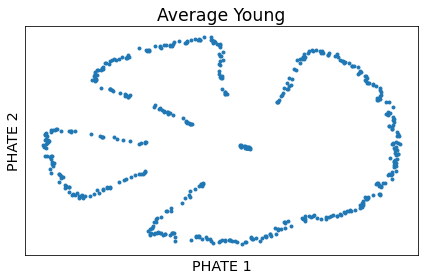

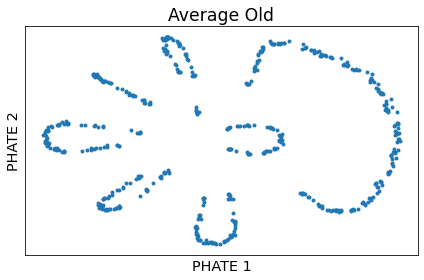

In [ ]:
scp.plot.scatter2d(phate_embd_young, ticks=None, label_prefix='PHATE ', title="Average Young")
scp.plot.scatter2d(phate_embd_old, ticks=None, label_prefix='PHATE ', title="Average Old")

The old subject's data seems to be more fragmented forming multiple breaking points and gaps compared to lesser number of discontinuations in younger subjects, on an average.

The above application of PHATE was done taking the BOLD values for each voxel along the row and the columns as the TRs, which is natural in the sense that we want to reduce the time dimension i.e. TR dimension to come up with a overall low-dimensional representation of the states of Voxels throughout the movie watching.

Below, just for the sake of exploring, we look at the dimensionality reduction of the number of voxels to see how the data is represented in a lower voxel dimensional space.

In [ ]:
phate_op = ph.PHATE()
phate_embd_young =  phate_op.fit_transform(avg_young_data)
phate_op = ph.PHATE()
phate_embd_old =  phate_op.fit_transform(avg_old_data)

Calculating PHATE...
  Running PHATE on 189 observations and 537 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.08 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 0.13 seconds.
  Calculating optimal t...
    Automatically selected t = 17
  Calculated optimal t in 0.05 seconds.
  Calculating diffusion potential...
  Calculating metric MDS...
  Calculated metric MDS in 0.11 seconds.
Calculated PHATE in 0.32 seconds.
Calculating PHATE...
  Running PHATE on 189 observations and 537 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.11 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 0.17 seconds.
  Calculating optimal t...
    Automatically selected t = 26
  Calculated

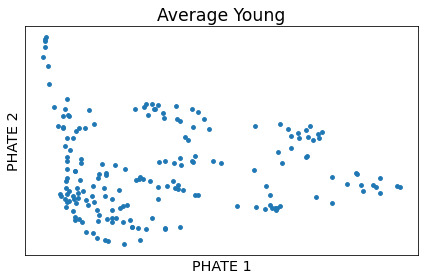

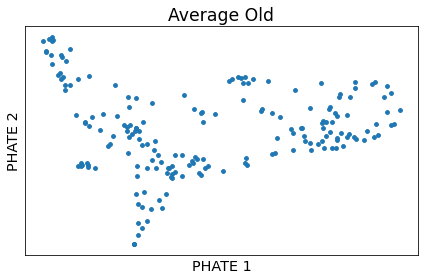

In [ ]:
scp.plot.scatter2d(phate_embd_young, ticks=None, label_prefix='PHATE ', title="Average Young")
scp.plot.scatter2d(phate_embd_old, ticks=None, label_prefix='PHATE ', title="Average Old")

The above representation we saw was carried out for entire movie watching duration, let's do PHATE on only the ascent and descent data corresponding to the 5th of it's kind i.e. 
- Ascent 5(A5): From TR 175 to 181
- Descent 5(D5): From TR 182 to 189

In [ ]:
young_data = np.load("young_data_537.npy")
old_data = np.load("old_data.npy")

In [ ]:
avg_young_data = np.mean(young_data[175:,:,:], axis=2)
avg_old_data = np.mean(young_data[175:,:,:], axis=2)

In [ ]:
phate_op = ph.PHATE()
phate_embd_young =  phate_op.fit_transform(avg_young_data.T)
phate_op = ph.PHATE()
phate_embd_old =  phate_op.fit_transform(avg_old_data.T)

Calculating PHATE...
  Running PHATE on 537 observations and 14 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.04 seconds.
  Calculating optimal t...
    Automatically selected t = 24
  Calculated optimal t in 0.28 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.13 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 0.55 seconds.
Calculated PHATE in 1.05 seconds.
Calculating PHATE...
  Running PHATE on 537 observations and 14 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.04 seconds.
  Calculating optimal t...
    Automatically selected t = 24
  Calculated optimal t in 0.27 seconds.

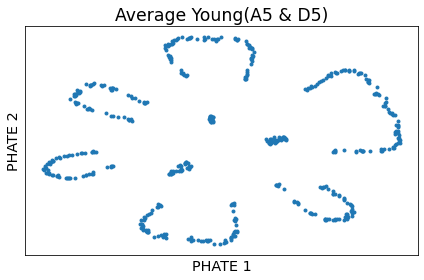

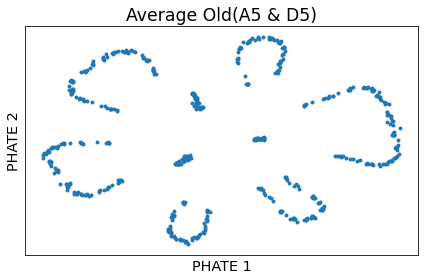

In [ ]:
scp.plot.scatter2d(phate_embd_young, ticks=None, label_prefix='PHATE ', title="Average Young(A5 & D5)")
scp.plot.scatter2d(phate_embd_old, ticks=None, label_prefix='PHATE ', title="Average Old(A5 & D5)")

Even though PHATE is usually done on very high dimensional datasets, we see remarkly similar PHATE representation for average old and average young subject's data on the 5th Ascent and Descent concatenated. Even the number of lobes that appear and discontinuities appear to be very similar.

Now, lateral OFC being an important region of interest for movie watching type task, we analyzed so far the PHATE carried out on this ROI. We, now shift our attention to the other ROIs data present with us.

Below, we will look at the mOFC comparison. Let's start with young subjects data.

In [ ]:
data = pd.ExcelFile(r"YOUNG/mOFC.xlsx", engine="openpyxl")

In [ ]:
len(data.sheet_names)

111

In [ ]:
y1_data = data.parse("Sheet1", header=None)
y1_data

,0,1,2,3,4,5,6,7,8,9,...,1690,1691,1692,1693,1694,1695,1696,1697,1698,1699
0,88.886499,58.286229,85.607899,97.265144,108.922390,62.657696,93.257966,103.822345,114.022435,73.950653,...,168.665775,163.201441,161.015707,155.187084,151.544195,171.580086,206.187534,197.080311,187.608799,184.694488
1,87.793632,57.921940,84.515032,96.536566,108.193812,62.657696,92.165099,102.729478,113.293857,73.950653,...,168.665775,164.294307,160.651418,154.094217,150.815617,170.851508,205.458957,196.716022,187.608799,185.423065
2,88.886499,60.471962,85.972187,97.629433,109.286679,64.843430,93.622255,104.186634,114.751013,75.407809,...,169.758641,163.930019,161.744285,155.915662,152.637062,170.851508,205.823245,196.716022,187.608799,185.058776
3,88.886499,58.650518,85.607899,97.629433,108.922390,63.021985,93.622255,104.186634,114.751013,74.314942,...,169.030064,163.201441,161.015707,154.822795,151.544195,171.580086,205.094668,195.987444,186.515932,183.601621
4,88.522210,59.014807,85.607899,97.265144,108.922390,63.021985,93.622255,104.186634,114.751013,75.043520,...,169.030064,163.201441,161.015707,155.187084,151.908484,170.851508,205.094668,195.987444,186.515932,183.965910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,92.165099,64.479141,89.979366,102.000900,113.293857,68.486319,99.086589,110.379546,120.943925,79.779276,...,169.758641,167.937197,162.472863,158.101396,157.008529,174.130109,204.730379,196.716022,189.065955,186.151643
185,92.893677,64.114852,91.072233,102.729478,113.658146,68.486319,99.815167,110.743835,120.943925,79.414987,...,169.030064,166.115752,161.744285,157.372818,155.915662,173.765820,203.637512,195.623155,187.244510,184.694488
186,92.529388,64.114852,90.707944,102.729478,114.022435,68.122030,100.179456,111.108124,121.672503,79.050698,...,167.208619,166.480041,160.287129,156.279951,155.187084,173.765820,203.637512,195.258867,186.880221,185.058776
187,93.257966,64.843430,91.436521,103.458056,114.386724,68.850608,100.543745,111.836702,122.036792,79.414987,...,169.394352,167.572908,162.472863,158.465685,157.372818,173.765820,204.366090,196.716022,189.065955,186.515932


In [ ]:
data = pd.ExcelFile("OLD/m_OFC_voxel.xlsx", engine="openpyxl")

In [ ]:
len(data.sheet_names)

25

In [ ]:
o1 = data.parse(sheet_name="Sheet1", header=None)
o1

,0,1,2,3,4,5,6,7,8,9,...,505,506,507,508,509,510,511,512,513,514
0,105.279501,124.222525,105.279501,116.208169,128.593992,132.965459,126.772548,105.279501,117.665324,130.051148,...,179.230154,179.958731,179.594443,174.858686,177.408709,178.865865,179.230154,178.865865,177.044420,180.323020
1,104.550923,122.765369,103.822345,114.751013,126.772548,131.144015,124.951103,104.186634,116.572458,128.593992,...,179.594443,180.687309,180.323020,174.858686,177.408709,178.865865,179.958731,179.594443,177.044420,181.051598
2,105.643790,124.951103,106.008079,116.936747,128.958281,133.694037,127.501126,106.008079,118.029613,130.051148,...,179.230154,180.323020,179.958731,174.858686,177.408709,178.501576,179.230154,178.865865,176.680131,181.051598
3,106.008079,124.951103,106.372368,117.301035,128.958281,132.965459,126.408259,106.008079,118.393902,130.415437,...,179.594443,180.323020,180.323020,175.222975,177.772998,178.865865,179.594443,179.230154,177.408709,180.687309
4,105.279501,124.222525,105.279501,116.572458,128.229703,132.601171,126.043970,105.279501,117.665324,130.051148,...,180.323020,181.051598,180.323020,175.587264,178.501576,179.958731,179.958731,179.230154,178.137287,181.780176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,102.365189,128.958281,108.558101,118.758191,129.686859,134.058326,129.322570,107.465234,117.665324,128.229703,...,183.237332,184.694488,185.058776,178.501576,181.780176,183.601621,185.423065,185.787354,182.508754,185.058776
185,103.093767,129.322570,108.558101,119.122480,130.051148,134.058326,129.322570,107.465234,118.393902,128.958281,...,184.330199,185.787354,185.787354,178.501576,182.144465,184.330199,186.151643,186.515932,182.873043,185.787354
186,102.000900,129.686859,109.286679,119.486769,130.051148,134.058326,128.958281,107.829523,118.393902,128.593992,...,184.330199,185.787354,185.787354,179.230154,182.873043,185.058776,186.151643,186.515932,183.601621,185.423065
187,103.093767,130.051148,108.922390,119.486769,130.415437,134.422615,129.322570,107.829523,118.758191,129.322570,...,185.058776,186.151643,185.787354,179.594443,183.601621,185.787354,186.515932,186.151643,184.330199,186.880221


Again, we observe there is a mismatch in the number of voxels in case of young and old subjects for mOFC i.e. there are 1700 Voxels for youngs whereas merely 515 Voxels for older people which was recorded. Hence, we will proceed with this part later when we have extracted the same 515 voxels for young subjects.